In [28]:
#http://blog.yhat.com/posts/customer-segmentation-using-python.html

In [29]:
import numpy as np
import pandas as pd

In [30]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

Excel Test.ipynb
WineKMC.xlsx


In [31]:
xls = pd.ExcelFile('WineKMC.xlsx')

In [32]:
sheet_name = xls.sheet_names
sheet_name

['OfferInformation',
 'Transactions',
 'Pivot',
 'Matrix',
 '4MC',
 '4MC - TopDealsByCluster',
 'Distances',
 '4MC Silhouette',
 '5MC',
 '5MC - TopDealsByCluster',
 '5MC Silhouette',
 '5MedC',
 '5MedC - TopDealsByCluster']

In [33]:
# Method 1 : Syntax error 
# create dataframe with loop
# exec('{} = pd.DataFrame()'.format(name)) >> got invalid syntax
# https://stackoverflow.com/questions/30635145/create-multiple-dataframes-in-loop

# Method 2 : use this one
# https://stackoverflow.com/questions/35374995/create-multiple-dataframe-using-for-loop-in-python-2-7

for name in sheet_name:
    globals()["df_" + name] = xls.parse(name)

In [34]:
# list all dataframe
# https://stackoverflow.com/questions/34949786/show-all-pandas-dataframes-in-an-ipython-notebook

%whos DataFrame

Variable                       Type         Data/Info
-----------------------------------------------------
customer_clusters              DataFrame    Offer # Customer Last Nam<...>n\n[100 rows x 4 columns]
df                             DataFrame         Offer #  Campaign   <...>\n[324 rows x 11 columns]
df_4MC                         DataFrame               Offer #   Camp<...>\n[38 rows x 111 columns]
df_4MC - TopDealsByCluster     DataFrame        Offer # Offer date   <...>   True   0   0   3   1  
df_4MC Silhouette              DataFrame              Name  Community<...>\n[100 rows x 13 columns]
df_5MC                         DataFrame               Offer #   Camp<...>\n[39 rows x 112 columns]
df_5MC - TopDealsByCluster     DataFrame        Offer # Offer date   <...>True   0   0   0   1  3  
df_5MC Silhouette              DataFrame              Name  Community<...>\n[100 rows x 14 columns]
df_5MedC                       DataFrame               Offer #   Camp<...>\n[39 rows x 112 c

In [35]:
df_OfferInformation.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


In [36]:
df_Transactions.head(10)

,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26
5,Williams,18
6,Williams,22
7,Williams,31
8,Brown,7
9,Brown,29


In [37]:
merged = pd.merge(df_OfferInformation, df_Transactions)
merged['n'] = 1
merged.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1
5,1,January,Malbec,72,56,France,False,Price,1
6,1,January,Malbec,72,56,France,False,Foster,1
7,1,January,Malbec,72,56,France,False,Sanders,1
8,1,January,Malbec,72,56,France,False,Butler,1
9,1,January,Malbec,72,56,France,False,Fisher,1


In [38]:
matrix = merged.pivot_table(index=['Customer Last Name'], columns=['Offer #'], values='n')
matrix = matrix.fillna(0).reset_index()
x_cols = matrix.columns[1:]
matrix.head(10)

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,Barnes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,Bell,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7,Bennett,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,Brooks,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Brown,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [39]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5)

In [40]:
cluster.fit(matrix[matrix.columns[2:]])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [41]:
# K means gives different result each time we redo it because the starting point is randomized
# https://stackoverflow.com/questions/25921762/changes-of-clustering-results-after-each-time-run-in-python-scikit-learn

matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

0    41
4    20
1    18
2    16
3     5
Name: cluster, dtype: int64

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [43]:
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['Customer Last Name', 'cluster', 'x', 'y']]
customer_clusters.head()

Offer #,Customer Last Name,cluster,x,y
0,Adams,1,-1.007580,0.108215
1,Allen,0,0.287539,0.044715
2,Anderson,2,0.392032,1.038391
3,Bailey,1,-0.699477,-0.022542
4,Baker,0,-0.088183,-0.471695


In [44]:
df = pd.merge(df_Transactions, customer_clusters)
df = pd.merge(df_OfferInformation, df)
df.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,cluster,x,y
0,1,January,Malbec,72,56,France,False,Thomas,0,1.041879,0.122314
1,1,January,Malbec,72,56,France,False,Jackson,0,0.839578,-0.328823
2,1,January,Malbec,72,56,France,False,Mitchell,0,0.342938,0.302186
3,1,January,Malbec,72,56,France,False,Peterson,2,0.797379,0.475995
4,1,January,Malbec,72,56,France,False,Wood,0,0.551215,-0.395670


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

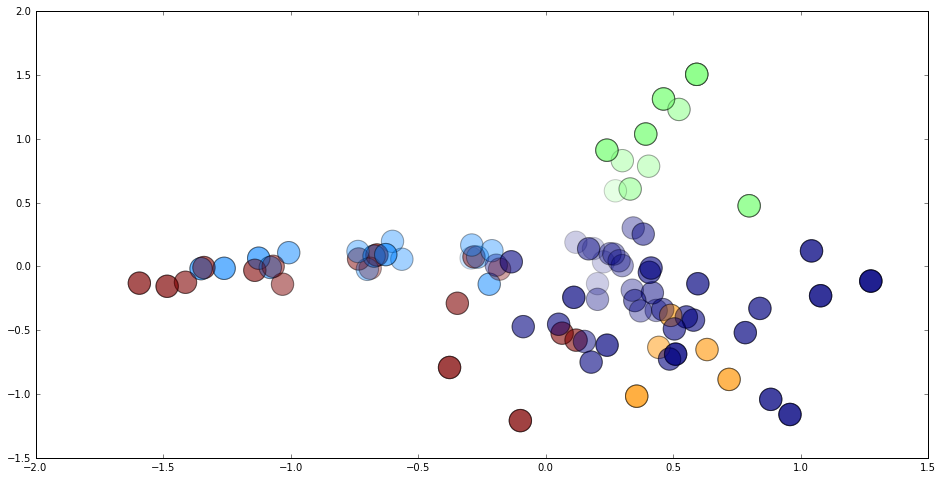

In [46]:
plt.figure(figsize=(16,8))
plt.scatter(df.x, df.y,c=df.cluster, s=500, alpha=0.2)

In [60]:
df[df.cluster == 0].Varietal

0                  Malbec
1                  Malbec
2                  Malbec
4                  Malbec
5                  Malbec
6                  Malbec
7                  Malbec
8                  Malbec
9                  Malbec
12             Pinot Noir
13             Pinot Noir
15             Pinot Noir
19             Pinot Noir
26              Champagne
29              Champagne
30              Champagne
34              Champagne
35              Champagne
36              Champagne
37              Champagne
38     Cabernet Sauvignon
39     Cabernet Sauvignon
40     Cabernet Sauvignon
41     Cabernet Sauvignon
42               Prosecco
45               Prosecco
47               Prosecco
49               Prosecco
51               Prosecco
61               Prosecco
              ...        
258    Cabernet Sauvignon
260    Cabernet Sauvignon
261    Cabernet Sauvignon
262    Cabernet Sauvignon
263    Cabernet Sauvignon
272          Pinot Grigio
284                Malbec
285         

In [56]:
df[df.cluster == 1]

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,cluster,x,y
25,3,February,Espumante,144,32,Oregon,True,Long,1,-0.221585,-0.139058
54,7,March,Prosecco,6,40,Australia,True,Brown,1,-1.079827,-0.007488
55,7,March,Prosecco,6,40,Australia,True,Taylor,1,-1.351253,-0.017026
58,7,March,Prosecco,6,40,Australia,True,Robinson,1,-0.672985,0.081453
59,7,March,Prosecco,6,40,Australia,True,King,1,-1.125346,0.065148
60,7,March,Prosecco,6,40,Australia,True,Green,1,-0.292635,0.066399
62,7,March,Prosecco,6,40,Australia,True,Carter,1,-1.260763,-0.014255
63,7,March,Prosecco,6,40,Australia,True,Murphy,1,-0.266997,0.073461
64,7,March,Prosecco,6,40,Australia,True,Rivera,1,-0.564060,0.056861
66,7,March,Prosecco,6,40,Australia,True,Bailey,1,-0.699477,-0.022542
